# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("Wholesale_Data.csv")

In [3]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
# check for missing values
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [5]:
# summary statistics
summary_stats = df.describe()
print(summary_stats)

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

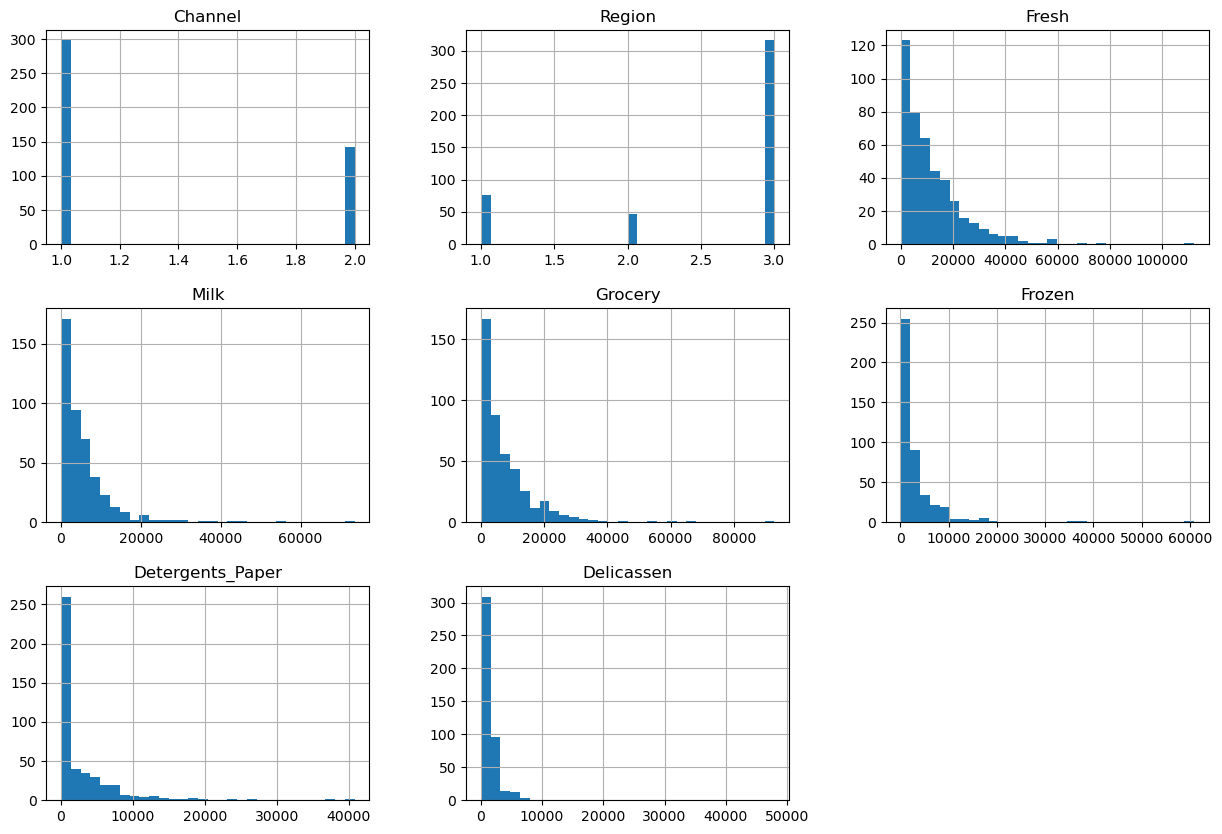

In [6]:
# histograms for each numerical column
df.hist(bins=30, figsize=(15, 10))
plt.show()

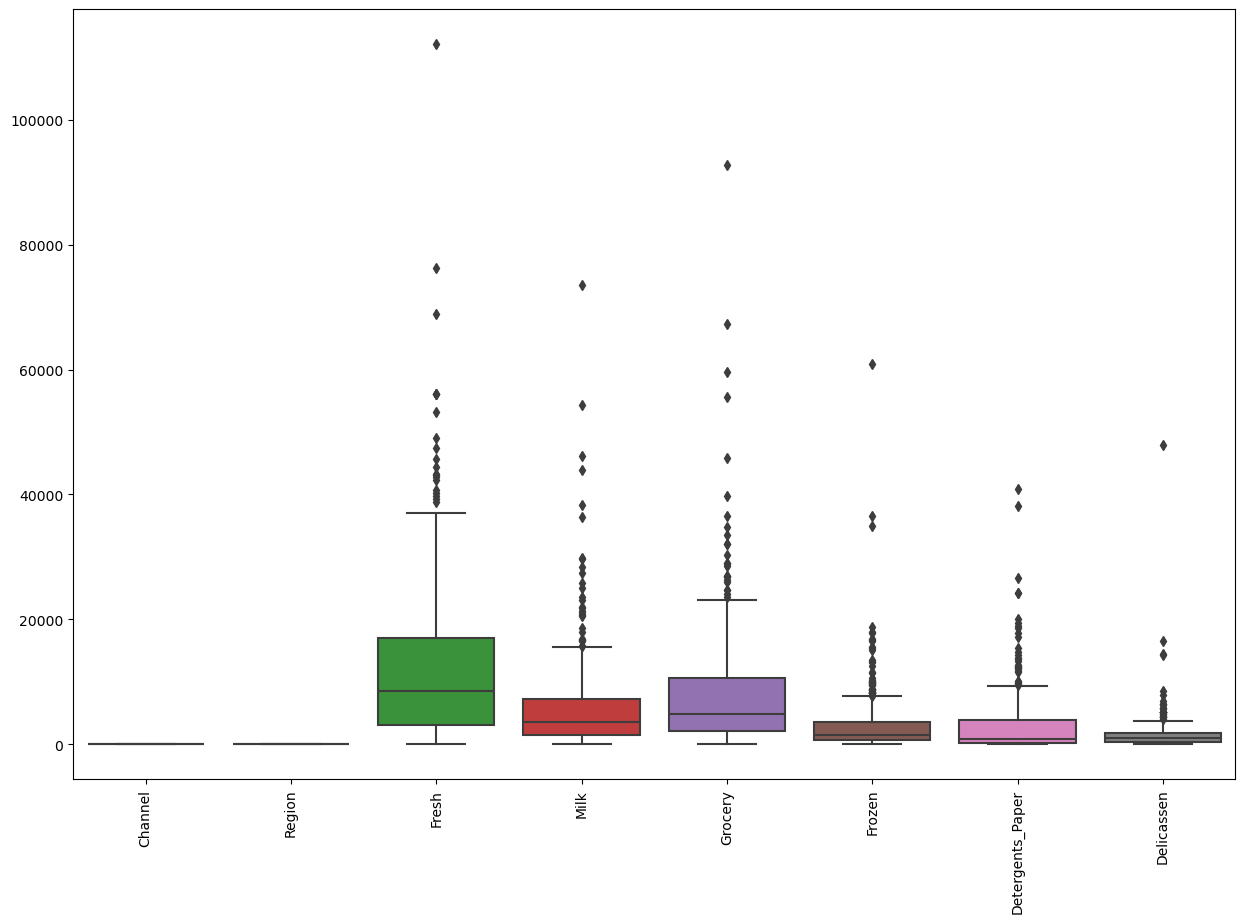

In [7]:
# box plots for each numerical column
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

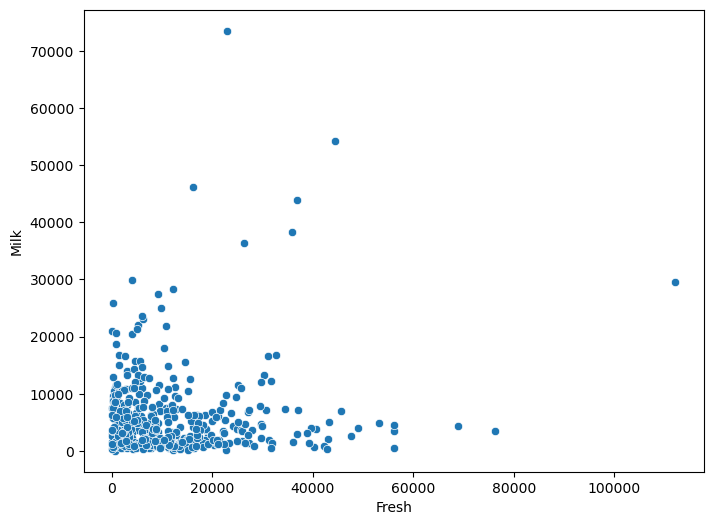

In [8]:
# scatter plot between 'Fresh' and 'Milk'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fresh', y='Milk', data=df)
plt.show()

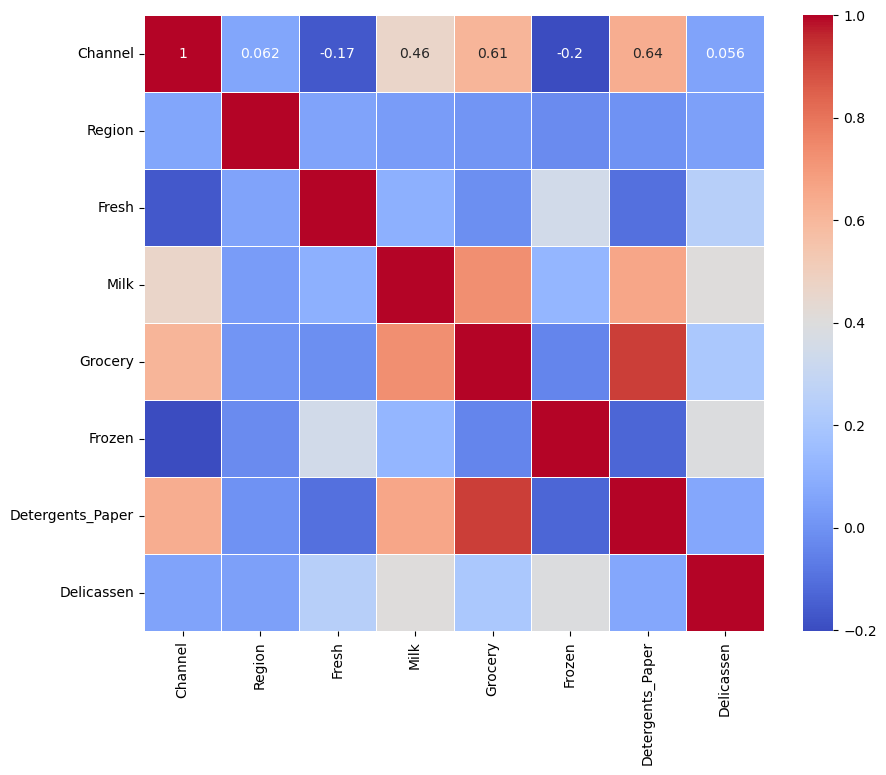

In [9]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [10]:
# calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers.sum()

Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

In [11]:
# define thresholds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Impute outliers with the median value of each column in the original DataFrame
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    col_median = df[col].median()
    # Identify outliers using IQR method
    outliers = (df[col] < lower_bound[col]) | (df[col] > upper_bound[col])
    # Replace outliers with the median
    df.loc[outliers, col] = col_median

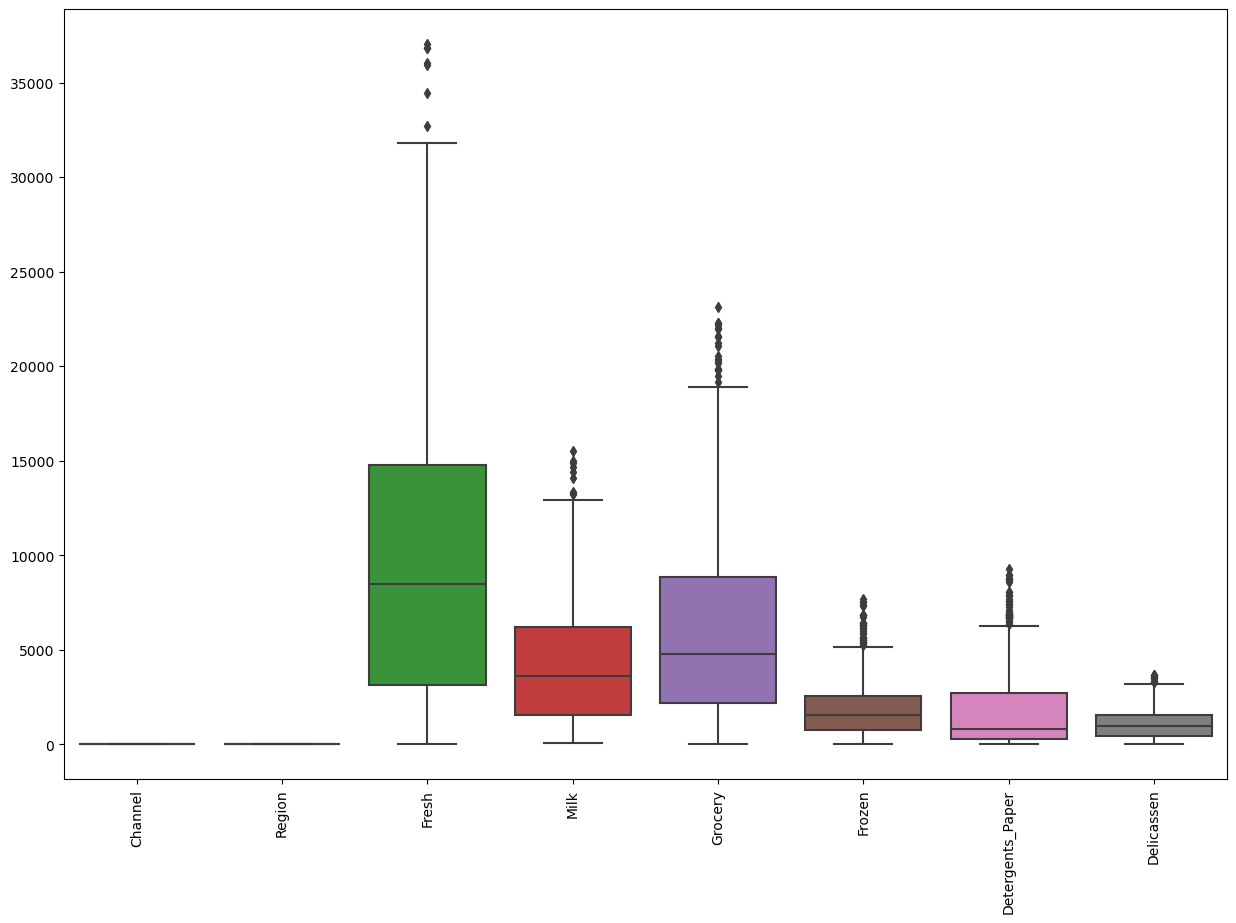

In [12]:
# box plots for each numerical column
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [13]:
# correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# specific correlation example
grocery_detergents_corr = df['Grocery'].corr(df['Detergents_Paper'])
print(f"Correlation between Grocery and Detergents_Paper: {grocery_detergents_corr}")

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.149529  0.582782  0.612943 -0.186964   
Region            0.062028  1.000000  0.036485  0.009571  0.027478 -0.123705   
Fresh            -0.149529  0.036485  1.000000 -0.063530 -0.090060  0.156847   
Milk              0.582782  0.009571 -0.063530  1.000000  0.615572 -0.119408   
Grocery           0.612943  0.027478 -0.090060  0.615572  1.000000 -0.135999   
Frozen           -0.186964 -0.123705  0.156847 -0.119408 -0.135999  1.000000   
Detergents_Paper  0.652230  0.054294 -0.225811  0.536854  0.711386 -0.173093   
Delicassen        0.158177 -0.033857  0.177479  0.236899  0.187171  0.068843   

                  Detergents_Paper  Delicassen  
Channel                   0.652230    0.158177  
Region                    0.054294   -0.033857  
Fresh                    -0.225811    0.177479  
Milk                      0.536854    0.236899  
Grocery                   0.711386

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [34]:
# step 1: pre-process the dataset
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_numeric = df[numeric_cols]

In [35]:
# standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [16]:
# step 2: determine the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

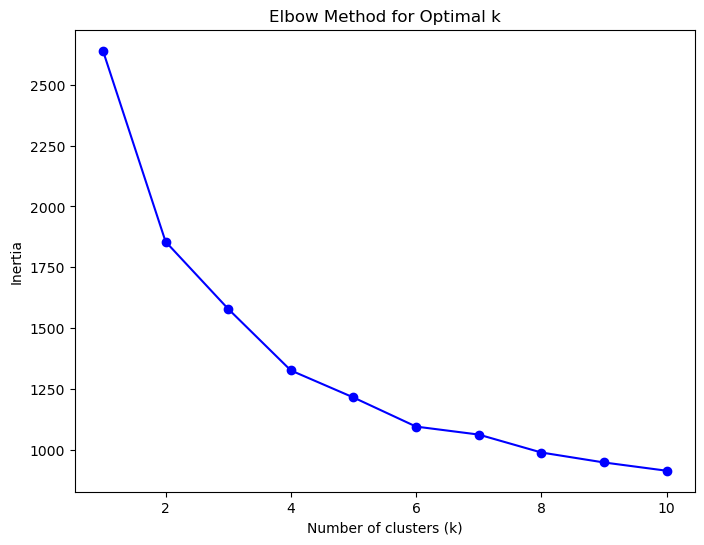

In [17]:
# plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [18]:
# step 3: initialize and fit the kmeans model
optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=2, random_state=42)

In [19]:
# step 4: evaluate the clustering
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_cols)
print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
          Fresh         Milk       Grocery       Frozen  Detergents_Paper  \
0   8064.375887  7803.546099  12289.836879  1386.836879       4251.755319   
1  10961.464883  2621.086957   3355.963211  2137.073579        652.683946   

    Delicassen  
0  1334.237589  
1   966.431438  


In [20]:
# visualize the clusters using a pair plot
# add cluster labels to the scaled dataFrame for visualization
df_scaled_with_clusters = pd.DataFrame(df_scaled, columns=numeric_cols)
df_scaled_with_clusters['Cluster'] = kmeans.labels_

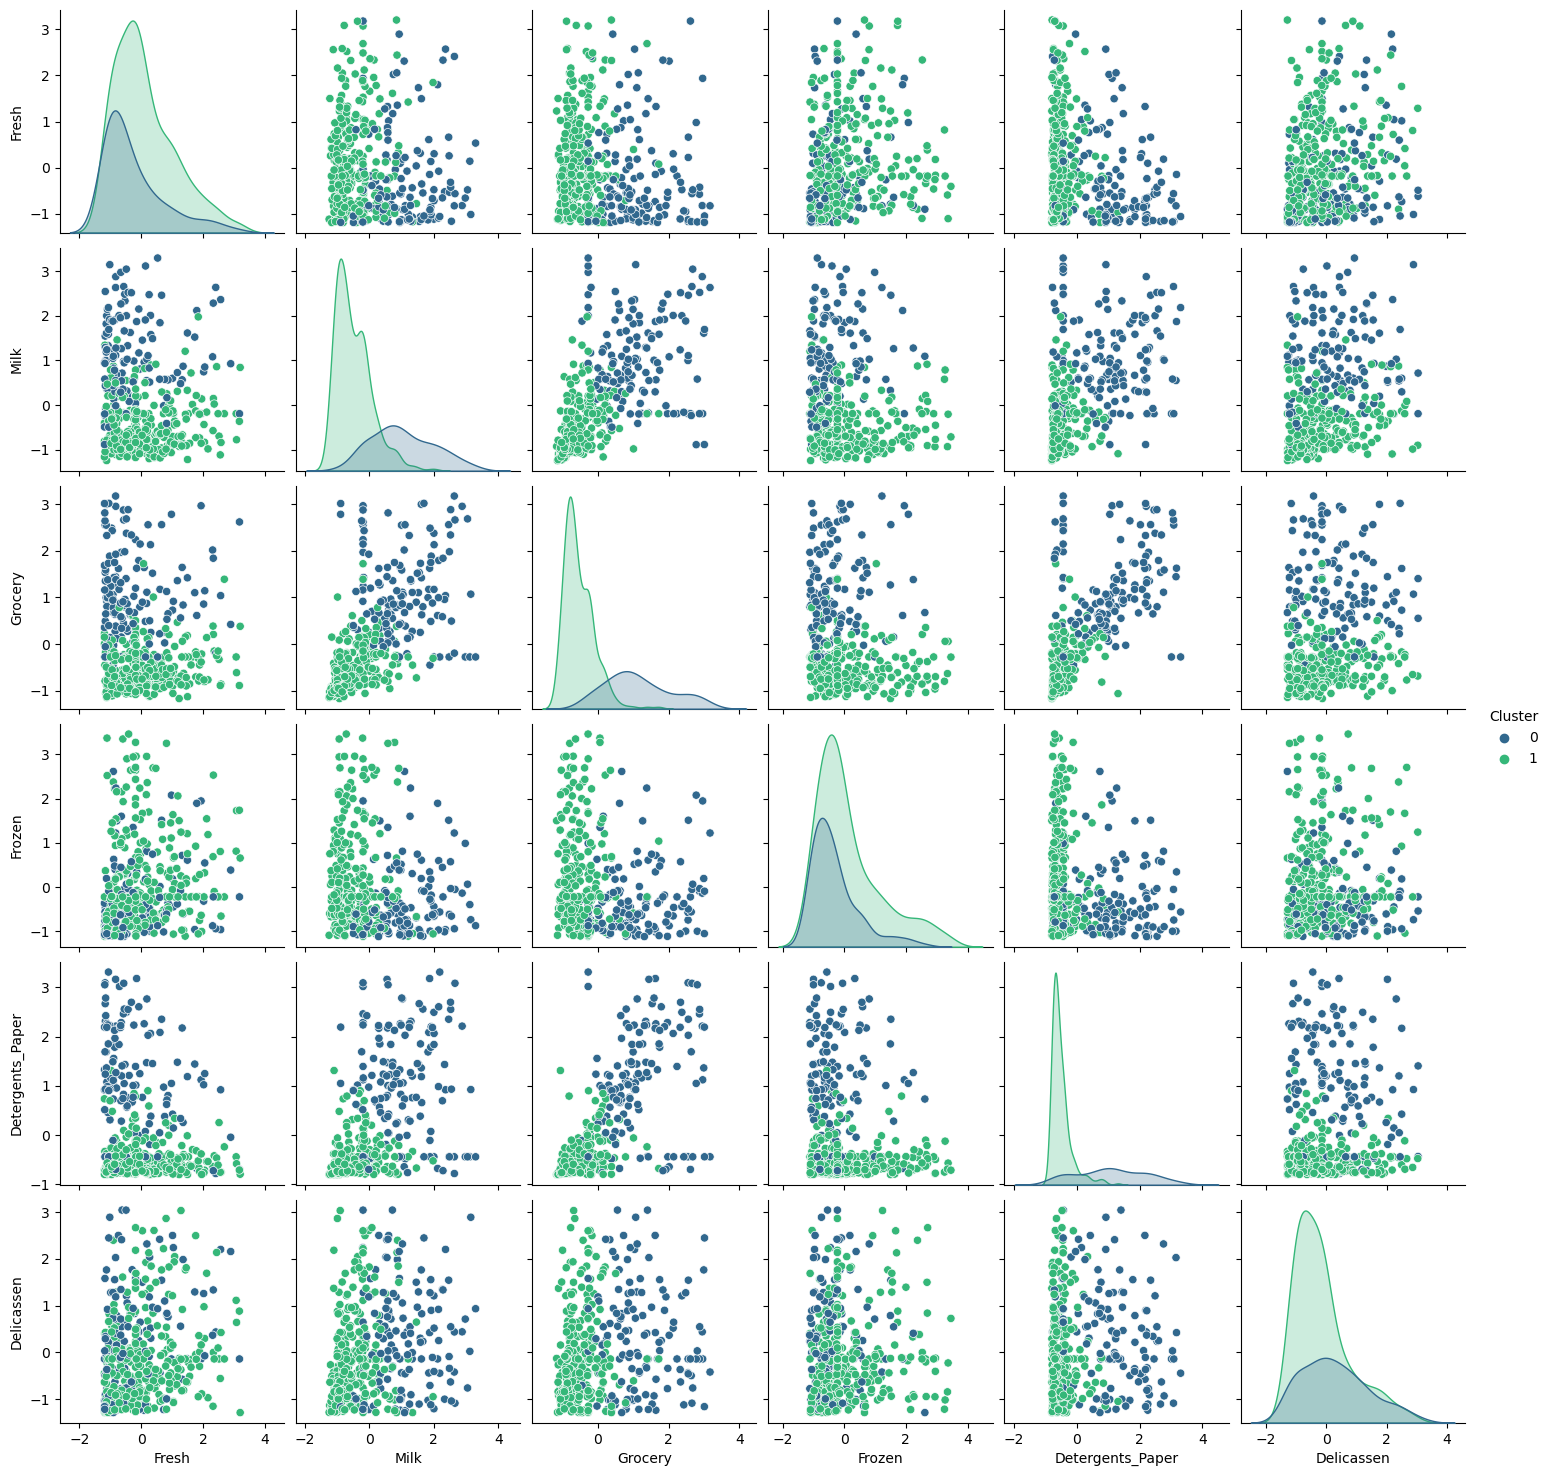

In [21]:
# plot pair plot
sns.pairplot(df_scaled_with_clusters, hue='Cluster', palette='viridis')
plt.show()

### Key Observations from the Pair Plot:

1. **Diagonal Plots (KDE Plots)**:
   - These plots show the distribution of individual variables within each cluster.
   - For example:
     - The `Fresh` variable shows two distinct peaks for clusters 0 and 1, indicating different central tendencies for each cluster.
     - The `Detergents_Paper` variable shows a clear separation between clusters, with cluster 1 (green) having higher values.

2. **Off-Diagonal Plots (Scatter Plots)**:
   - These plots show pairwise relationships between variables and how these relationships vary between clusters.
   - For example:
     - `Fresh` vs. `Milk`: Cluster 1 (green) tends to have higher `Milk` values than cluster 0 (blue).
     - `Frozen` vs. `Grocery`: Cluster 1 (green) has a wider spread of `Grocery` values compared to cluster 0 (blue).

### Detailed Interpretation:

#### 1. Fresh vs. Other Variables:
- **Fresh vs. Milk**:
  - Cluster 1 (green) has higher `Milk` values than cluster 0 (blue).
  - There is no clear separation in `Fresh` values between the clusters.
- **Fresh vs. Grocery**:
  - Similar to `Milk`, cluster 1 (green) tends to have higher `Grocery` values.
  - The scatter plot shows that `Fresh` values are spread across both clusters.
- **Fresh vs. Frozen**:
  - There is a wider spread of `Frozen` values within each cluster.
  - Both clusters overlap significantly in `Fresh` values.
- **Fresh vs. Detergents_Paper**:
  - Cluster 1 (green) has higher `Detergents_Paper` values, with a clear distinction.
- **Fresh vs. Delicassen**:
  - Both clusters overlap significantly, with no clear separation.

#### 2. Milk vs. Other Variables:
- **Milk vs. Grocery**:
  - Cluster 1 (green) has higher `Grocery` values, indicating a positive relationship between these variables.
  - There is a significant overlap, but the trend shows that higher `Milk` values are associated with higher `Grocery` values for cluster 1.
- **Milk vs. Frozen**:
  - Both clusters overlap, but cluster 1 shows a wider spread in `Frozen` values.
- **Milk vs. Detergents_Paper**:
  - A clear separation is visible, with cluster 1 (green) having higher `Detergents_Paper` values.
- **Milk vs. Delicassen**:
  - Both clusters overlap significantly, with no clear distinction.

#### 3. Grocery vs. Other Variables:
- **Grocery vs. Frozen**:
  - Both clusters overlap, but there is a wider spread in `Grocery` values for cluster 1 (green).
- **Grocery vs. Detergents_Paper**:
  - A clear separation, with cluster 1 (green) having higher `Detergents_Paper` values.
- **Grocery vs. Delicassen**:
  - Both clusters overlap, with no clear distinction.

#### 4. Frozen vs. Other Variables:
- **Frozen vs. Detergents_Paper**:
  - Both clusters overlap, but cluster 1 (green) tends to have higher `Detergents_Paper` values.
- **Frozen vs. Delicassen**:
  - Both clusters overlap, with no clear distinction.

#### 5. Detergents_Paper vs. Delicassen:
- A clear separation is visible, with cluster 1 (green) having higher `Detergents_Paper` values, while `Delicassen` values overlap.

### Summary:

- **Cluster 1 (green)** generally has higher values for `Milk`, `Grocery`, and `Detergents_Paper`.
- **Cluster 0 (blue)** generally has lower values for `Milk`, `Grocery`, and `Detergents_Paper`.
- There is significant overlap between the clusters in `Fresh`, `Frozen`, and `Delicassen` values, indicating these variables may not strongly differentiate the clusters.
- `Detergents_Paper` is a strong distinguishing variable between the clusters.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [22]:
# compute the distance matrix
distance_matrix = pdist(df_scaled, metric='euclidean')
distance_matrix = squareform(distance_matrix)

In [23]:
# perform hierarchical clustering
Z = linkage(df_scaled, method='ward')

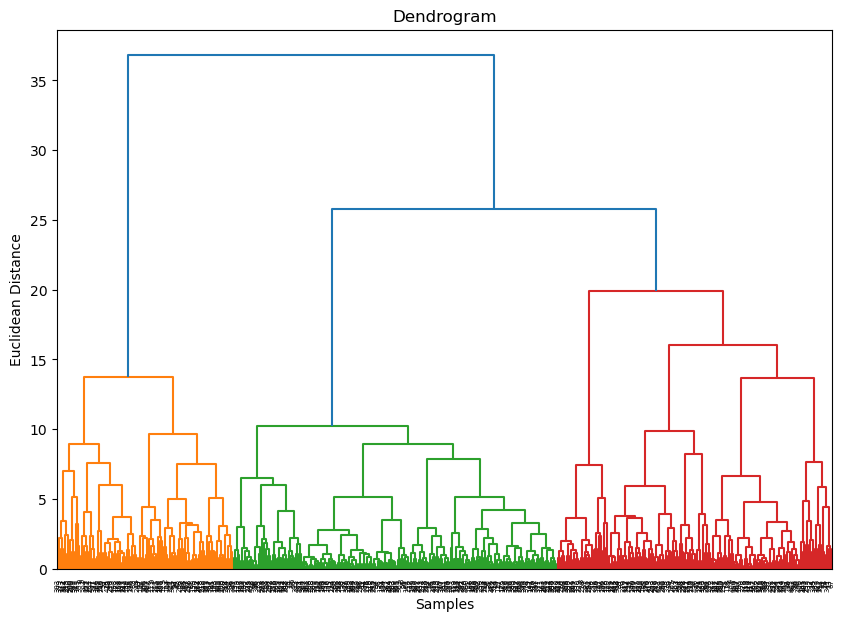

In [24]:
# plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [25]:
# choose the number of clusters 
num_clusters = 2

# Assign cluster labels
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

# add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

In [26]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561.0,214,2674.0,1338.0,1
1,2,3,7057,9810,9568.0,1762,3293.0,1776.0,1
2,2,3,6353,8808,7684.0,2405,3516.0,965.5,1
3,1,3,13265,1196,4221.0,6404,507.0,1788.0,2
4,2,3,22615,5410,7198.0,3915,1777.0,965.5,2


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [36]:
# Step 2: Perform PCA
pca = PCA(n_components=3)  # You can choose the number of components you want to keep
pca_result = pca.fit_transform(df_scaled)

In [38]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

In [39]:
# Add the PCA components to the original DataFrame
df['PC1'] = pca_df['PC1']
df['PC2'] = pca_df['PC2']
df['PC3'] = pca_df['PC3']
print(pca_df.head())

        PC1       PC2       PC3
0  1.375533  0.156069 -0.959349
1  1.793365  0.474858  0.032155
2  1.264655 -0.080847  0.628800
3 -1.406251  1.834049  1.872765
4 -0.194076  1.440576  0.592919


In [40]:
# Step 3: Analyze Principal Components
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

Explained variance by each principal component: [0.3968675  0.21581413 0.14476953]


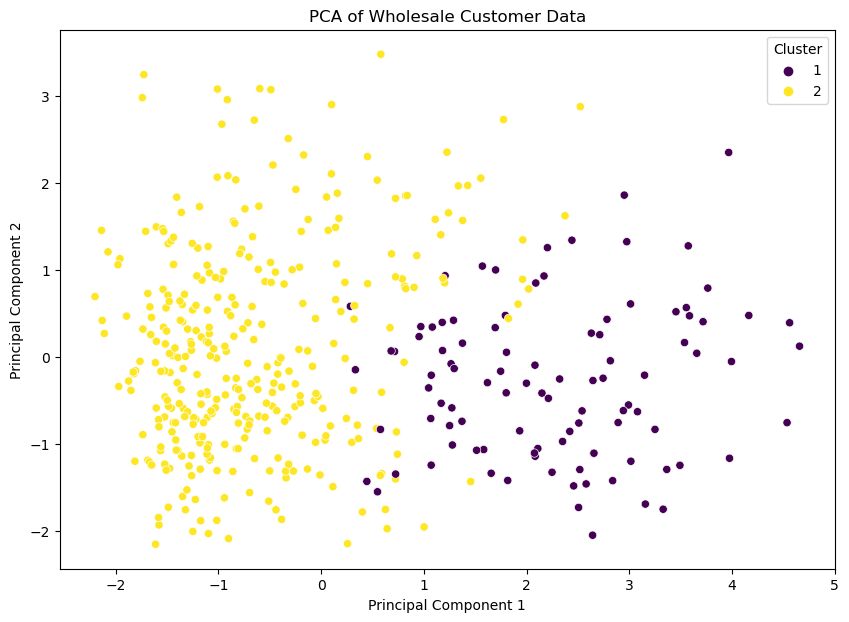

In [41]:
# Step 4: Visualize Principal Components
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis')
plt.title('PCA of Wholesale Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.